In [2]:
import random
random.randrange(200, 400)

344

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    'Day': range(1, 22),
    "Sales": [np.random.randint(200, 400) for i in range(1, 22)]
}
df = pd.DataFrame(data)

ts = df["Sales"].values
mu = np.mean(ts)


In [4]:
# Possible epsilon values excluding 0
possible_eps = [-5, -4, -3, -2, -1, 1, 2, 3, 3, 5]

# Generate epsilon of same length as ts
epsilon = np.random.choice(possible_eps, len(ts))
epsilon

array([ 1, -4, -1, -5,  5,  1,  3, -5,  5, -3,  2, -2,  3, -3, -1, -3,  2,
       -1,  3,  2, -4])

In [5]:
# MA(2) coefficients
theta1 = 0.5
theta2 = 0.3
ma2_series = [mu + epsilon[0], mu + epsilon[1] + theta1 * epsilon[0]]  # t=0  # t=1
ma2_series

[298.3333333333333, 293.8333333333333]

In [6]:
for t in range(2, len(ts)):
    x_t = mu + epsilon[t] + theta1 * epsilon[t - 1] + theta2 * epsilon[t - 2]
    ma2_series.append(x_t)
ma2_series

[298.3333333333333,
 293.8333333333333,
 294.6333333333333,
 290.6333333333333,
 299.5333333333333,
 299.3333333333333,
 302.3333333333333,
 294.1333333333333,
 300.7333333333333,
 295.3333333333333,
 299.3333333333333,
 295.43333333333334,
 299.93333333333334,
 295.2333333333333,
 295.7333333333333,
 292.93333333333334,
 297.5333333333333,
 296.43333333333334,
 300.43333333333334,
 300.5333333333333,
 295.2333333333333]

In [9]:
epsilon_next = np.random.choice(possible_eps, 1)[0]
epsilon_next

forecast_next = mu + theta1 * epsilon[-1] + theta2 * epsilon[-2] + epsilon_next
print("Forecast for next day:", forecast_next)

Forecast for next day: 291.93333333333334


In [15]:
df

,Day,Sales
0,1,302
1,2,379
2,3,292
3,4,214
4,5,306
5,6,271
6,7,388
7,8,220
8,9,302
9,10,321


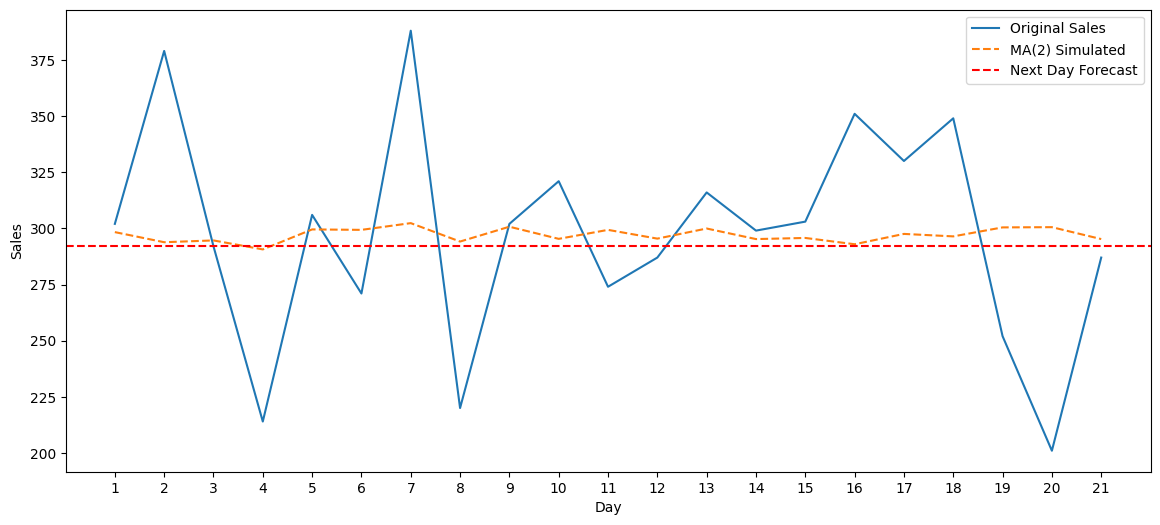

In [17]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(14, 6))  # Width=14 inches, Height=6 inches

plt.plot(df["Day"], ts, label="Original Sales")
plt.plot(df["Day"], ma2_series, linestyle="--", label="MA(2) Simulated")
plt.axhline(y=forecast_next, color="r", linestyle="--", label="Next Day Forecast")

# Force x-axis ticks to be integers
plt.xticks(df["Day"])


plt.xlabel("Day")
plt.ylabel("Sales")
plt.legend()
plt.show()

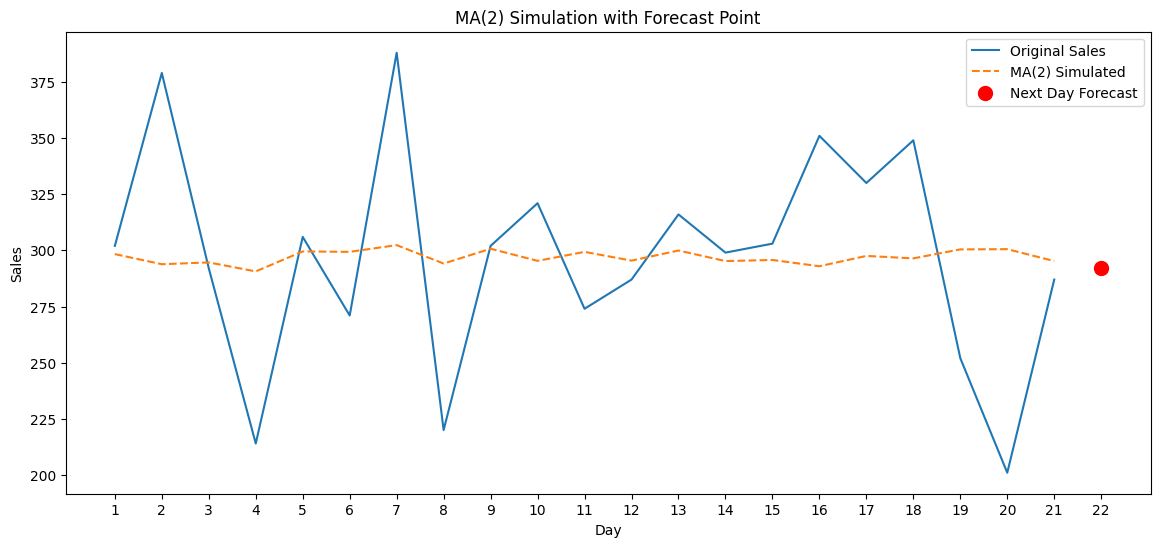

In [18]:
plt.figure(figsize=(14, 6))  # wider figure

plt.plot(df["Day"], ts, label="Original Sales")
plt.plot(df["Day"], ma2_series, linestyle="--", label="MA(2) Simulated")

# Plot next day forecast as a red point
plt.scatter(22, forecast_next, color="red", s=100, label="Next Day Forecast")

plt.xticks(list(df["Day"]) + [22])  # include Day 22 on x-axis
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("MA(2) Simulation with Forecast Point")
plt.legend()
plt.show()